# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [18]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [19]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [20]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [21]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [23]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

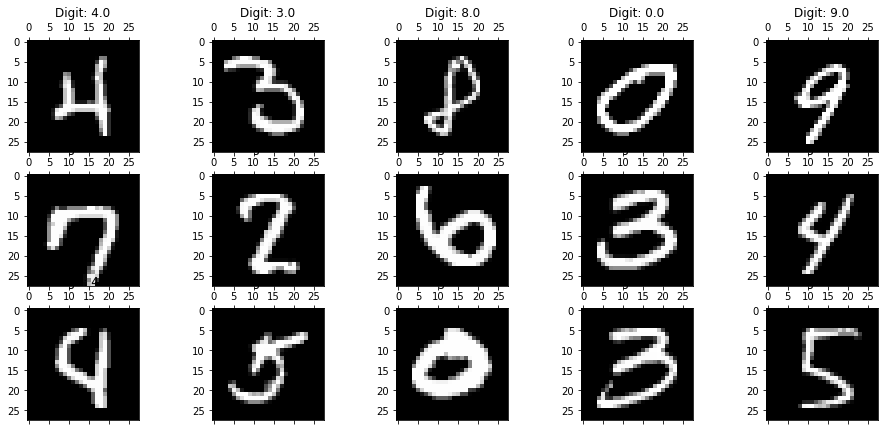

In [24]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [26]:
from sklearn.decomposition import PCA

ratio = {}

for i in range(1, 101):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()

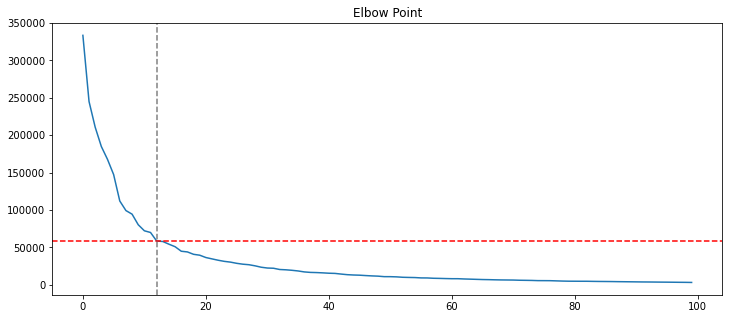

In [27]:
# 고유값
value = np.sort(pca.explained_variance_)[::-1]

plt.figure(figsize=(12, 5))

plt.plot(value)
plt.axhline(value[13], color = 'red', ls = '--')
plt.title('Elbow Point')
plt.axvline(12, ls='--', color='grey')

plt.show()

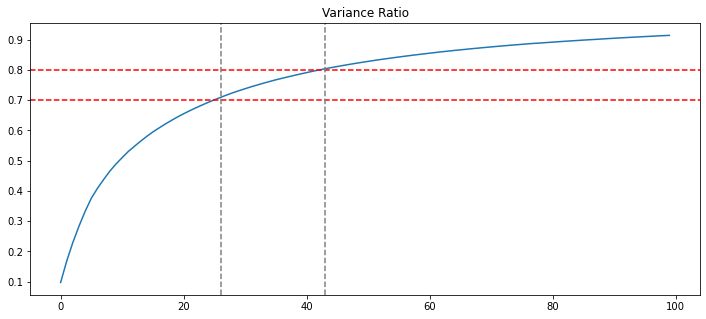

In [28]:
plt.figure(figsize=(12, 5))

plt.plot(ratio.values())
plt.axhline(0.7, color = 'red', ls = '--')
plt.axhline(0.8, color = 'red', ls = '--')
plt.title('Variance Ratio')
plt.axvline(26, ls='--', color='grey')
plt.axvline(43, ls='--', color='grey')

plt.show()

In [29]:
pca = PCA(n_components = 26)
pca.fit(X_train)

train_pca = pd.DataFrame(pca.transform(X_train))
test_pca = pd.DataFrame(pca.transform(X_test))

In [30]:
train_pca

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,971.895215,-398.380055,-16.246755,353.808731,-790.463324,140.262372,344.687284,-266.778892,-316.599193,465.818636,...,471.826045,32.571173,23.320694,139.391908,-240.898232,-32.032818,-172.531218,123.366700,127.131882,-65.244843
1,-976.242588,-615.493446,123.734843,64.886192,-254.174341,222.469457,-26.829602,-127.682892,464.974531,-43.328288,...,-1.395907,3.991879,-70.120134,-13.595990,-32.948027,63.503494,-16.065842,-50.267872,26.299118,-99.787029
2,-969.308936,-370.844938,66.736236,169.139374,-423.354599,-214.798168,323.579113,-273.364868,-60.451319,68.656986,...,-140.548547,-170.477079,-49.775686,-148.519119,-34.944617,119.338902,161.168285,29.304697,-153.880829,40.597202
3,281.355894,-242.570605,-414.552365,-32.753978,84.561979,-483.985390,848.887022,-195.219329,31.233794,234.791619,...,268.120667,-518.909060,-65.828699,-151.100103,27.018167,374.584754,-79.633996,61.074861,-113.457623,9.688093
4,422.211142,-143.477149,-234.854988,36.212527,572.077840,-1028.425944,61.595042,-9.418241,-245.479414,-152.837219,...,45.149923,-246.914771,-185.032312,82.897759,-106.610647,244.898363,-260.100594,197.589840,24.275745,-114.497340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,-296.328590,372.985526,449.158244,226.573078,-76.062536,-744.347799,103.793870,50.254895,-484.911241,110.009839,...,127.601883,-16.524814,-19.847066,219.064946,-97.595795,-47.686878,-76.758121,191.351796,164.006001,-85.477616
55996,1490.454513,-116.589263,-665.118153,135.260446,-363.985646,763.344728,452.605363,-168.384704,96.327708,-22.601332,...,156.918889,-24.683072,-382.457504,-48.579405,-166.262737,-20.660026,145.953485,-126.857992,1.603789,331.406393
55997,-334.874396,-489.775577,-820.892981,32.162670,649.199829,342.638513,802.515093,-332.520775,558.544870,216.378196,...,-9.299819,-149.489507,163.011817,-90.164634,-64.549705,126.016588,392.253513,187.270701,124.750849,-193.879065
55998,-624.919203,-88.132036,-165.071930,66.866932,-218.332026,-551.447888,224.562592,-296.555535,-354.415468,177.036366,...,-225.490118,-54.686922,96.204193,-169.913495,-143.179778,-90.885349,145.491912,-45.290748,98.389542,-1.679808


In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, (y_train.ravel()))
train_lda = lda.transform(X_train)
test_lda = lda.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

# 원본
start = time.time()
dt_origin = DecisionTreeClassifier()
dt_origin.fit(X_train, y_train)
dt_origin_pred = dt_origin.predict(X_test)
accuracy1 = accuracy_score(y_test, dt_origin_pred)
end = time.time()
print("원본데이터", "\n정확도", accuracy1, "\n시간",f"{end - start:.5f} sec")

print()

# PCA
start = time.time()
dt_pca = DecisionTreeClassifier()
dt_pca.fit(train_pca, y_train)
dt_pca_pred = dt_pca.predict(test_pca)
accuracy2 = accuracy_score(y_test, dt_pca_pred)
end = time.time()
print("PCA", "\n정확도", accuracy2, "\n시간", f"{end - start:.5f} sec")

print()

# LDA
start = time.time()
dt_lda = DecisionTreeClassifier()
dt_lda.fit(X_train, y_train)
dt_lda_pred = dt_lda.predict(X_test)
accuracy3 = accuracy_score(y_test, dt_lda_pred)
end = time.time()
print("LDA", "\n정확도", accuracy3, "\n시간", f"{end - start:.5f} sec")

원본데이터 
정확도 0.8742857142857143 
시간 21.47493 sec

PCA 
정확도 0.8462142857142857 
시간 3.71439 sec

LDA 
정확도 0.8752857142857143 
시간 20.91101 sec


### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

# 원본
start = time.time()
lr_origin = LogisticRegression()
lr_origin.fit(X_train, y_train.ravel())
lr_origin_pred = lr_origin.predict(X_test)
accuracy1 = accuracy_score(y_test, lr_origin_pred)
end = time.time()
print("원본데이터", "\n정확도", accuracy1, "\n시간",f"{end - start:.5f} sec")

print()

# PCA
start = time.time()
lr_pca = LogisticRegression()
lr_pca.fit(train_pca, y_train.ravel())
lr_pca_pred = lr_pca.predict(test_pca)
accuracy2 = accuracy_score(y_test, lr_pca_pred)
end = time.time()
print("PCA", "\n정확도", accuracy2, "\n시간", f"{end - start:.5f} sec")

print()

# LDA
start = time.time()
lr_lda = LogisticRegression()
lr_lda.fit(train_lda, y_train.ravel())
lr_lda_pred = lr_lda.predict(test_lda)
accuracy3 = accuracy_score(y_test, lr_lda_pred)
end = time.time()
print("LDA", "\n정확도", accuracy3, "\n시간", f"{end - start:.5f} sec")

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


원본데이터 
정확도 0.9199285714285714 
시간 12.27913 sec



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PCA 
정확도 0.8877142857142857 
시간 4.25784 sec

LDA 
정확도 0.8855 
시간 2.36003 sec


특정한 틀 없이 자유롭게 해주시면 됩니다!